# Question 3 - How does the number of people flying between different locations change over time?

In [1]:
#import necassary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read complete_data csv
complete_data = pd.read_csv('cleaned_data.csv')

# Number of people flying per month

In [3]:
#set index as the respective year
yearly_data = complete_data.set_index('Year')
yearly_data.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,,,,,,,,,,,,,,,,,,,,,
2007,0,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,389,4,11,0,0,0,0,0,0,0
2007,1,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,479,5,6,0,0,0,0,0,0,0
2007,2,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,479,6,9,0,0,3,0,0,0,31
2007,3,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,479,3,8,0,0,23,0,0,0,3
2007,4,1,1,1,831.0,830,957.0,1000,WN,2278,...,479,3,9,0,0,0,0,0,0,0


In [4]:
#seperate complete_data by the year 2006
flights_06 = yearly_data.loc[[2006]]
#group data by month and get number of flights per month
flights_06 = flights_06.groupby(['Month']).size().reset_index()
flights_06

,Month,0
0,1,569594
1,2,518152
2,3,595975
3,4,577146
4,5,594110
5,6,585660
6,7,607881
7,8,616497
8,9,573179
9,10,598567


In [5]:
#change title of 0 coloumn to number of flights 
flights_06['Number of flights'] = flights_06[0]
#insert coloumn dor the year of flight
flights_06['Year'] = 2006
#remove unnecassary coloumns from data
flights_06 = flights_06[['Year','Month','Number of flights']]
flights_06

,Year,Month,Number of flights
0,2006,1,569594
1,2006,2,518152
2,2006,3,595975
3,2006,4,577146
4,2006,5,594110
5,2006,6,585660
6,2006,7,607881
7,2006,8,616497
8,2006,9,573179
9,2006,10,598567


In [6]:
#seperate complete_data by the year 2007
flights_07 = yearly_data.loc[[2007]]
#group data by month and get number of flights pr month
flights_07 = flights_07.groupby(['Month']).size().reset_index()
flights_07

,Month,0
0,1,604311
1,2,538643
2,3,620782
3,4,602037
4,5,623052
5,6,609512
6,7,632548
7,8,638562
8,9,592488
9,10,621435


In [7]:
#change title of o coloumn to Number of flights
flights_07['Number of flights'] = flights_07[0]
#insert a coloumn for the year of flight
flights_07['Year'] = 2007
#remove unnecessary coloumns
flights_07 = flights_07[['Year','Month','Number of flights']]
flights_07

,Year,Month,Number of flights
0,2007,1,604311
1,2007,2,538643
2,2007,3,620782
3,2007,4,602037
4,2007,5,623052
5,2007,6,609512
6,2007,7,632548
7,2007,8,638562
8,2007,9,592488
9,2007,10,621435


In [8]:
#combine flights_07 and flights_06 datasets together
monthly_flights = pd.concat([flights_06,flights_07]).reset_index()
monthly_flights

,index,Year,Month,Number of flights
0,0,2006,1,569594
1,1,2006,2,518152
2,2,2006,3,595975
3,3,2006,4,577146
4,4,2006,5,594110
5,5,2006,6,585660
6,6,2006,7,607881
7,7,2006,8,616497
8,8,2006,9,573179
9,9,2006,10,598567


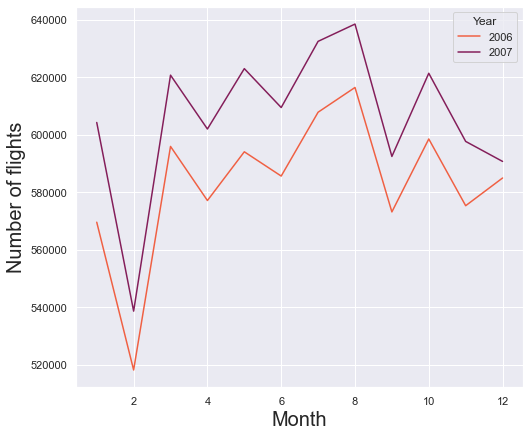

In [9]:
#plot monthly_flights dataset into a line plot
sns.set(rc = {'figure.figsize':(8,7)})
sns.lineplot( data = monthly_flights, x = 'Month',y= 'Number of flights', hue = 'Year',palette=sns.color_palette('rocket_r', n_colors=2))
plt.xlabel("Month",size=20)
plt.ylabel("Number of flights",size=20)
plt.show()

# Routes with the highest number of flights

In [10]:
#group complete_data by the year,origin and destination and get total number of flights
route_data = complete_data.groupby(['Year','Month','Origin','Dest']).size().reset_index()
route_data

,Year,Month,Origin,Dest,0
0,2006,1,ABE,ATL,89
1,2006,1,ABE,CLE,78
2,2006,1,ABE,CLT,31
3,2006,1,ABE,CVG,73
4,2006,1,ABE,DTW,2
...,...,...,...,...,...
102907,2007,12,YUM,IPL,54
102908,2007,12,YUM,LAS,19
102909,2007,12,YUM,LAX,89
102910,2007,12,YUM,PHX,141


In [11]:
#create function to join origin and destination in order to get the route
def join (origin, destination):
 route = origin + ":" + destination
 return route
#insert the coloumn route into route_data by applying join function
route_data['route'] = route_data.apply(lambda x: join(x['Origin'], x['Dest']), axis=1)
route_data

,Year,Month,Origin,Dest,0,route
0,2006,1,ABE,ATL,89,ABE:ATL
1,2006,1,ABE,CLE,78,ABE:CLE
2,2006,1,ABE,CLT,31,ABE:CLT
3,2006,1,ABE,CVG,73,ABE:CVG
4,2006,1,ABE,DTW,2,ABE:DTW
...,...,...,...,...,...,...
102907,2007,12,YUM,IPL,54,YUM:IPL
102908,2007,12,YUM,LAS,19,YUM:LAS
102909,2007,12,YUM,LAX,89,YUM:LAX
102910,2007,12,YUM,PHX,141,YUM:PHX


In [12]:
#change 0 coloumn name to number of flights
route_data['number of flights'] = route_data[0]
#assign necessary coloumns to route_data
route_data = route_data[['Year','route','number of flights']]
route_data

,Year,route,number of flights
0,2006,ABE:ATL,89
1,2006,ABE:CLE,78
2,2006,ABE:CLT,31
3,2006,ABE:CVG,73
4,2006,ABE:DTW,2
...,...,...,...
102907,2007,YUM:IPL,54
102908,2007,YUM:LAS,19
102909,2007,YUM:LAX,89
102910,2007,YUM:PHX,141


In [13]:
#group route_data by the yaer and route taken and get total number of flights 
route_data = route_data.groupby(['Year','route'])['number of flights'].sum().reset_index()
route_data

,Year,route,number of flights
0,2006,ABE:ATL,1117
1,2006,ABE:AVP,2
2,2006,ABE:CLE,1067
3,2006,ABE:CLT,362
4,2006,ABE:CVG,949
...,...,...,...
9679,2007,YUM:IPL,628
9680,2007,YUM:LAS,98
9681,2007,YUM:LAX,964
9682,2007,YUM:PHX,1714


In [14]:
#filter route_data by year 2006
route_data_06 = route_data[(route_data['Year']==2006)]
#sort number flights by descending order
route_data_06 = route_data_06.sort_values(by = 'number of flights', ascending=False)
#get the top 20 routes with highest number of flights in 2006
route_06_top10 =route_data_06.head(10)
route_06_top10

,Year,route,number of flights
2502,2006,LAX:SAN,14279
3944,2006,SAN:LAX,14256
3224,2006,OGG:HNL,13743
1880,2006,HNL:OGG,13689
2474,2006,LAX:LAS,13373
2388,2006,LAS:LAX,12912
2546,2006,LGA:BOS,11828
526,2006,BOS:LGA,11804
3638,2006,PHX:LAX,11640
1165,2006,DCA:LGA,11519


In [15]:
#filter route_data by 2007
route_data_07 = route_data[(route_data['Year']==2007)]
#sort data by descending order
route_data_07 = route_data_07.sort_values(by = 'number of flights', ascending=False)
route_data_07

,Year,route,number of flights
8106,2007,OGG:HNL,15920
6634,2007,HNL:OGG,15712
7244,2007,LAX:LAS,14120
7153,2007,LAS:LAX,13575
6631,2007,HNL:LIH,13093
...,...,...,...
8678,2007,PVD:BOS,1
4713,2007,ACY:MYR,1
6503,2007,FWA:CVG,1
7807,2007,MKE:MKC,1


In [20]:
#get top 20 routes that had the highest number of flights in 2006, from the route_data_2007 dataset 
route_07_top10 = route_data_07[(route_data_07['route'] =='LAX:SAN') | (route_data_07['route'] =='SAN:LAX') | (route_data_07['route'] =='OGG:HNL')|(route_data_07['route'] =='HNL:OGG')|
                              (route_data_07['route'] =='LAS:LAX')|(route_data_07['route'] =='LGA:BOS')|(route_data_07['route'] =='BOS:LGA') | 
                               (route_data_07['route'] =='PHX:LAX') | (route_data_07['route'] =='DCA:LGA')| (route_data_07['route'] =='LAX:LAS')]
    
route_07_top10

,Year,route,number of flights
8106,2007,OGG:HNL,15920
6634,2007,HNL:OGG,15712
7244,2007,LAX:LAS,14120
7153,2007,LAS:LAX,13575
7272,2007,LAX:SAN,12603
8892,2007,SAN:LAX,12584
8551,2007,PHX:LAX,11612
5225,2007,BOS:LGA,11457
7319,2007,LGA:BOS,11447
5849,2007,DCA:LGA,10789


In [21]:
#combine the number of flights for the top 20 routes in 2006 and 2007
top10_routes = pd.concat([route_06_top10,route_07_top10])
top10_routes

,Year,route,number of flights
2502,2006,LAX:SAN,14279
3944,2006,SAN:LAX,14256
3224,2006,OGG:HNL,13743
1880,2006,HNL:OGG,13689
2474,2006,LAX:LAS,13373
2388,2006,LAS:LAX,12912
2546,2006,LGA:BOS,11828
526,2006,BOS:LGA,11804
3638,2006,PHX:LAX,11640
1165,2006,DCA:LGA,11519


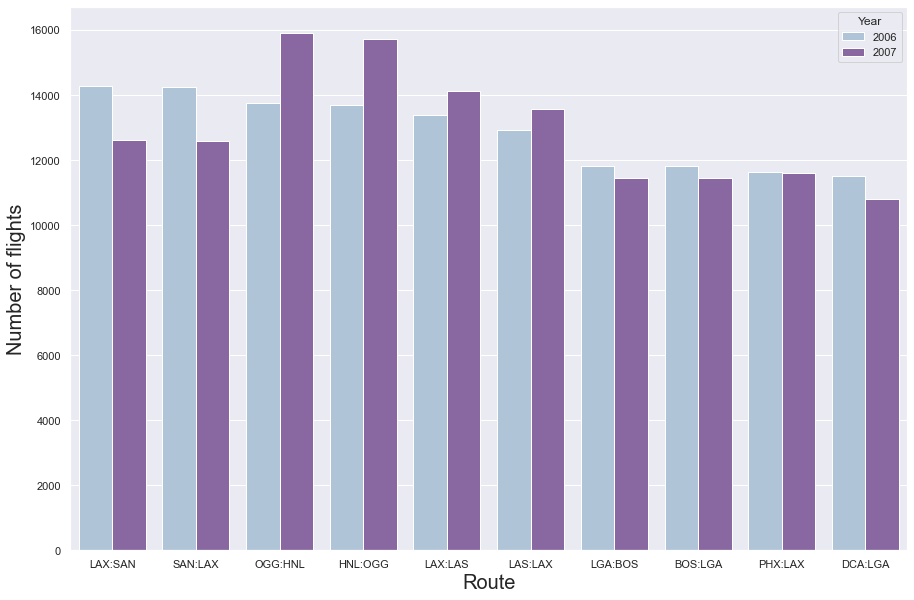

In [26]:
#plot top 20 routes with on a barplot comparing 2006 and 2007 flights
sns.set(rc = {'figure.figsize':(15,10)})
sns.barplot(data= top10_routes,x='route',y='number of flights',hue='Year',palette=sns.color_palette('BuPu', n_colors=2))
plt.xlabel("Route",size=20)
plt.ylabel("Number of flights",size=20)
plt.show()